In [ ]:
!pip install sktime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 63.8 MB/s eta 0:00:00


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 70.6 MB/s eta 0:00:00


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdstanpy-1.1.0
  error: subprocess-exited-with-error
  
  × Running setup.py install for fbprophet did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series, plot_correlations, plot_lags
from sktime.forecasting.arima import AutoARIMA, ARIMA
from sktime.performance_metrics.forecasting import MeanAbsoluteScaledError
from pylab import rcParams
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.forecasting.all import *



%matplotlib inline

/usr/local/lib/python3.9/dist-packages/sktime/utils/validation/_dependencies.py:143: UserWarning: str requires package 'dtw-python' to be present in the python environment, but 'dtw-python' was not found. 'dtw-python' is a soft dependency and not included in the base sktime installation. Please run: `pip install dtw-python` to install the dtw-python package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/sktime/utils/validation/_dependencies.py:143: UserWarning: No module named 'pyod'. 'pyod' is a soft dependency and not included in the base sktime installation. Please run: `pip install pyod` to install the pyod package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/sktime/utils/validation/_dependencies.py:143: UserWarning: No module named 'hmmlearn'. 'hmmlearn.hmm' is a soft dependency and not included in the base sk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/calls_per_hour.csv")


In [ ]:
data

,DATE_TIME,UNIQUE_ID
0,2011-01-01 00:00:00,123
1,2011-01-01 01:00:00,111
2,2011-01-01 02:00:00,81
3,2011-01-01 03:00:00,53
4,2011-01-01 04:00:00,118
...,...,...
52603,2016-12-31 19:00:00,366
52604,2016-12-31 20:00:00,320
52605,2016-12-31 21:00:00,225
52606,2016-12-31 22:00:00,216


In [ ]:
duplicates = data[data.duplicated(subset='DATE_TIME')]
print(duplicates)

In [ ]:
data['UNIQUE_ID'].isna().sum()

0

In [ ]:
data=data.rename(columns={'UNIQUE_ID':'number_calls_hour'})
data

,DATE_TIME,number_calls_hour
0,2011-01-01 00:00:00,123
1,2011-01-01 01:00:00,111
2,2011-01-01 02:00:00,81
3,2011-01-01 03:00:00,53
4,2011-01-01 04:00:00,118
...,...,...
52603,2016-12-31 19:00:00,366
52604,2016-12-31 20:00:00,320
52605,2016-12-31 21:00:00,225
52606,2016-12-31 22:00:00,216


In [ ]:
duplicates = data[data.duplicated(subset='DATE_TIME')]
print(duplicates)

There's no missing values

In [ ]:
fig = px.line(data, y="number_calls_hour", x= 'DATE_TIME', title='Number of calls per hour')
fig.show()

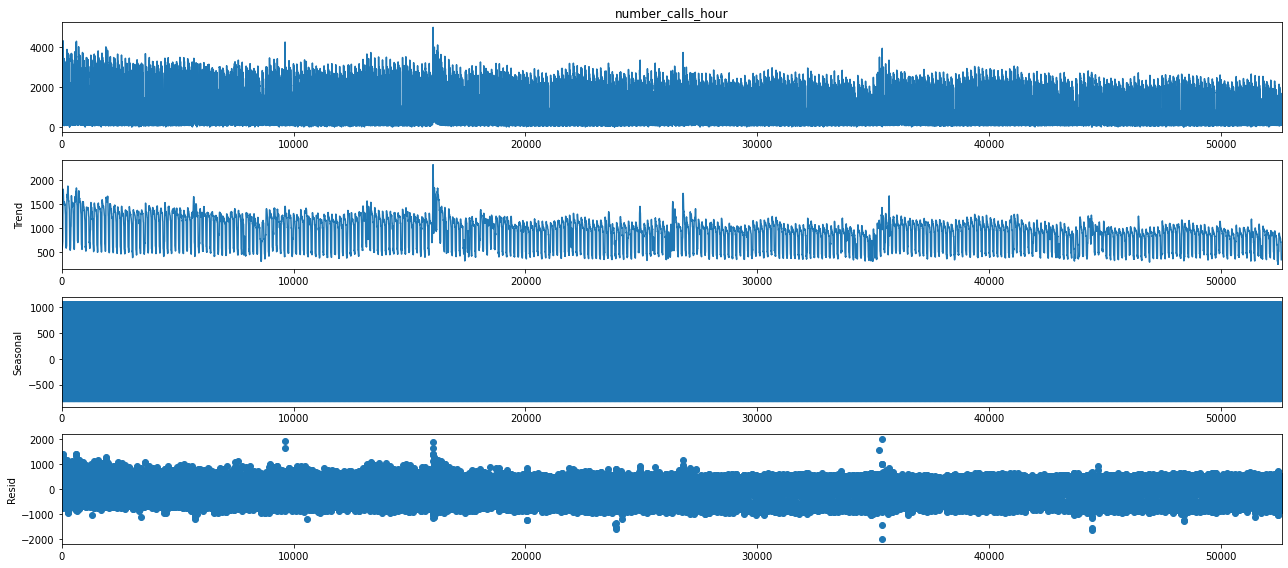

In [ ]:
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])
rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(data['number_calls_hour'], model='additive', period=24)
fig = decomposition.plot()
plt.show()


# ADFULLER - Augmented Dickey Fuller Test (ADF Test)

Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.

In [ ]:
result = adfuller(data['number_calls_hour'], autolag="AIC")

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lags Used: %f' % result[2])
print('Number of Observations: %f' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


In [ ]:
result

(-34.65297863818267,
 0.0,
 58,
 52549,
 {'1%': -3.430474448028772,
  '5%': -2.861595003531693,
  '10%': -2.5667992765505505},
 667488.216006633)

In [ ]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [ ]:
adf_test(data['number_calls_hour'])

The ADF statistic is -34.652979, which is a large negative value. This indicates that there is strong evidence against the null hypothesis of a unit root (non-stationarity) in the data.
The p-value is 0.0, which is < significance level of 0.05. This means that we can reject the null hypothesis and conclude that the data is stationary.
The number of lags used in the test is 58, and the number of observations is 52549.
The critical values at the 1%, 5%, and 10% levels are -3.430, -2.862, and -2.567, respectively. 
Since the ADF statistic is more negative than these critical values, we can reject the null hypothesis at any of these levels.
Finally, the last value, icbest, is the maximized information criterion of the regression. This value is used to select the optimal number of lags in the regression model. In this case, the optimal number of lags is likely around 58.

Therefore, **this time series IS STATIONARY according to this test.**

In [ ]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags = "auto") # In later versions, the "lags" option has been replaced by "nlags"
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [ ]:
kpss_test(data['number_calls_hour'])

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




The test statistic is 14.738202 and the p-value is 0.01, which is smaller than the 5% significance level. This suggests that the null hypothesis of stationarity is rejected and the **time series is not stationary.**

**Test results are not consistent**

From statsmodel
Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.
Here, due to the difference in the results from ADF test and KPSS test, it can be inferred that the series is trend stationary and not strict stationary. The series can be detrended by differencing or by model fitting.

Detrending by Differencing¶
It is one of the simplest methods for detrending a time series. A new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step.

In [ ]:
# Take the first difference of the series
diff_series = data['number_calls_hour'].diff().dropna()

adf_test(diff_series)

In [ ]:
kpss_test(diff_series)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




According to this test, the p-values is 0.10 > 0.05. On the other hand, the test statistic is 0.0098 which is smaller than the critical value corresponding to a significance level of 5% = 0.46. Therefore, according to this test we accept the null hypothesis H0 which is: TS is stationary.


# Decomposing the TS

In [ ]:
diff_series

1       -12.0
2       -30.0
3       -28.0
4        65.0
5       -28.0
         ... 
52603   -27.0
52604   -46.0
52605   -95.0
52606    -9.0
52607    11.0
Name: number_calls_hour, Length: 52607, dtype: float64

In [ ]:
new_data = pd.DataFrame
new_data = data['DATE_TIME']
new_data = pd.concat([new_data, diff_series], axis=1)
new_data

,DATE_TIME,number_calls_hour
0,2011-01-01 00:00:00,NaN
1,2011-01-01 01:00:00,-12.0
2,2011-01-01 02:00:00,-30.0
3,2011-01-01 03:00:00,-28.0
4,2011-01-01 04:00:00,65.0
...,...,...
52603,2016-12-31 19:00:00,-27.0
52604,2016-12-31 20:00:00,-46.0
52605,2016-12-31 21:00:00,-95.0
52606,2016-12-31 22:00:00,-9.0


In [ ]:
new_data['number_calls_hour'].isna().sum()

1

In [ ]:
new_data['number_calls_hour']=new_data['number_calls_hour'].fillna(data['number_calls_hour'][0])
new_data

,DATE_TIME,number_calls_hour
0,2011-01-01 00:00:00,123.0
1,2011-01-01 01:00:00,-12.0
2,2011-01-01 02:00:00,-30.0
3,2011-01-01 03:00:00,-28.0
4,2011-01-01 04:00:00,65.0
...,...,...
52603,2016-12-31 19:00:00,-27.0
52604,2016-12-31 20:00:00,-46.0
52605,2016-12-31 21:00:00,-95.0
52606,2016-12-31 22:00:00,-9.0


In [ ]:
new_data.dtypes

DATE_TIME            datetime64[ns]
number_calls_hour           float64
dtype: object

In [ ]:
new_data['DATE_TIME'] = pd.to_datetime(new_data['DATE_TIME'])

In [ ]:
new_data.dtypes

DATE_TIME            datetime64[ns]
number_calls_hour           float64
dtype: object

In [ ]:
new_data.set_index('DATE_TIME', inplace=True)

In [ ]:
# seasonal decomposition
result = seasonal_decompose(new_data['number_calls_hour'], model='additive')

In [ ]:
print(result.trend) # By default the previous function uses a "rolling mean" with a window of three values
print(result.seasonal) # Seasonal component
print(result.resid) # Remainder
print(result.observed) # Original TS.

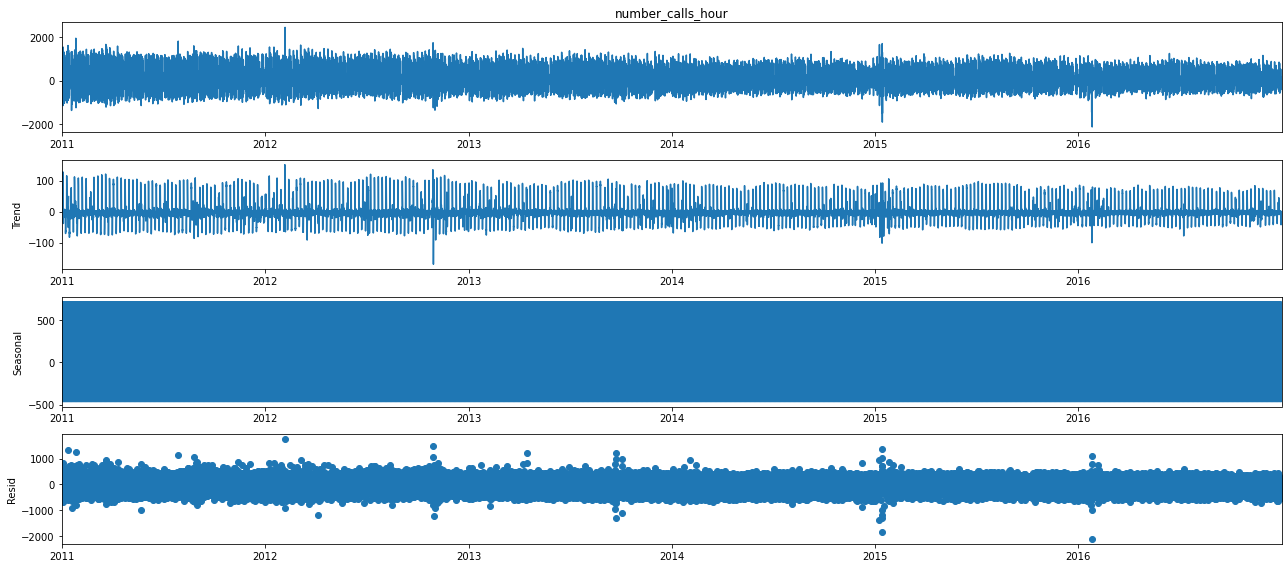

In [ ]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(new_data['number_calls_hour'], model='additive')
fig = decomposition.plot()
plt.show()

# ACF and PACF

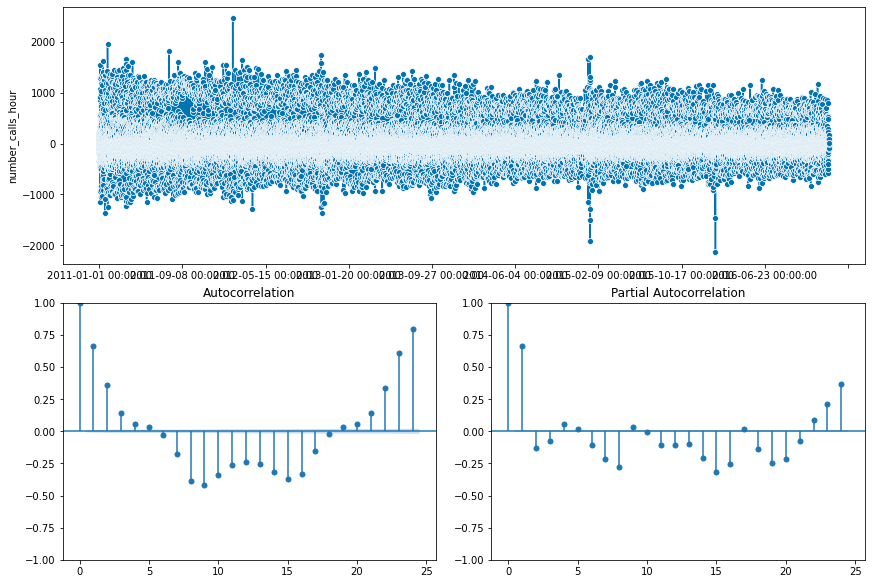

In [ ]:
plot_correlations(new_data['number_calls_hour']);

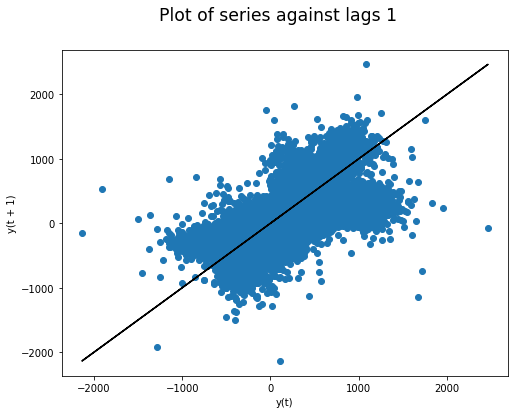

In [ ]:
fig, ax = plot_lags(new_data['number_calls_hour'])
plt.plot(new_data['number_calls_hour'],new_data['number_calls_hour'],color="black")
plt.show()

# Train-test split

In [ ]:
y_train, y_test = temporal_train_test_split(new_data['number_calls_hour'], train_size=0.8) 

display(y_train.head())
display(y_test.head())

2011-01-01 00:00:00    123.0
2011-01-01 01:00:00    -12.0
2011-01-01 02:00:00    -30.0
2011-01-01 03:00:00    -28.0
2011-01-01 04:00:00     65.0
Name: number_calls_hour, dtype: float64

2015-10-20 14:00:00    -22.0
2015-10-20 15:00:00    -21.0
2015-10-20 16:00:00   -270.0
2015-10-20 17:00:00   -569.0
2015-10-20 18:00:00   -481.0
Name: number_calls_hour, dtype: float64

In [ ]:
len(y_train)
#len(y_test)

42086

# Forecasting 

In [ ]:
fh_train = fh = ForecastingHorizon(y_train.index, freq="H", is_relative=False)

print(fh_train)

In [ ]:
fh_test = ForecastingHorizon(y_test.index, freq="H", is_relative=False)

print(fh_test)

# Facebook Prophet

In [ ]:
forecaster_prophet_25 = Prophet(seasonality_mode='additive',n_changepoints=25)

forecaster_prophet_25.fit(y_train)  
forecaster_prophet_25.get_params()

{'add_country_holidays': None,
 'add_seasonality': None,
 'alpha': 0.05,
 'changepoint_prior_scale': 0.05,
 'changepoint_range': 0.8,
 'changepoints': None,
 'daily_seasonality': 'auto',
 'freq': None,
 'growth': 'linear',
 'growth_cap': None,
 'growth_floor': 0.0,
 'holidays': None,
 'holidays_prior_scale': 10.0,
 'mcmc_samples': 0,
 'n_changepoints': 25,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10.0,
 'stan_backend': None,
 'uncertainty_samples': 1000,
 'verbose': 0,
 'weekly_seasonality': 'auto',
 'yearly_seasonality': 'auto'}

In [ ]:
results = pd.DataFrame({"Set":["Train"]*len(y_train)+["Test"]*len(y_test),
                        "number_calls_hour":new_data['number_calls_hour']})

In [ ]:
results['naive'] = np.abs(results["number_calls_hour"]-results["number_calls_hour"].shift())
quotient_train = results[results['Set']=="Train"]['naive'].mean()
quotient_test = results[results['Set']=="Test"]['naive'].mean()


In [ ]:

results.loc[results["Set"]=="Train","Prophet_Predicted_25"] = forecaster_prophet_25.predict(fh_train).values
results.loc[results["Set"]=="Test","Prophet_Predicted_25"]  = forecaster_prophet_25.predict(fh_test).values
results["Prophet_Residuals_25"] = results["number_calls_hour"] - results["Prophet_Predicted_25"]
results.loc[results["Set"]=="Train","Prophet_q_25"] = np.abs(results.loc[results["Set"]=="Train","Prophet_Residuals_25"])/quotient_train
results.loc[results["Set"]=="Test","Prophet_q_25"]  = np.abs(results.loc[results["Set"]=="Test","Prophet_Residuals_25"])/quotient_test

results = results.reset_index().rename(columns={"index":"Date"})

In [ ]:
mase = MeanAbsoluteScaledError()
mase(y_train, results.loc[results["Set"]=="Train","Prophet_Predicted_25"], y_train=y_train)

/usr/local/lib/python3.9/dist-packages/sktime/performance_metrics/forecasting/_classes.py:411: UserWarning:

y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.

/usr/local/lib/python3.9/dist-packages/sktime/performance_metrics/forecasting/_classes.py:422: UserWarning:

y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.



0.7309191702350127

In [ ]:
mase(y_test, results.loc[results["Set"]=="Test","Prophet_Predicted_25"], y_train=y_test)

/usr/local/lib/python3.9/dist-packages/sktime/performance_metrics/forecasting/_classes.py:411: UserWarning:

y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.

/usr/local/lib/python3.9/dist-packages/sktime/performance_metrics/forecasting/_classes.py:422: UserWarning:

y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.



0.8003698789610537

In [ ]:
fig = px.line(data_frame=results, x='Date', y='number_calls_hour', color='Set',
              title='Actual vs Predicted Number of Calls', labels={'number_calls_hour': 'Number of Calls'})
fig.add_scatter(x=results[results['Set']=='Train']['Date'], y=results[results['Set']=='Train']['Prophet_Predicted_25'], 
                mode='lines', name='Prophet Train Predictions')
fig.add_scatter(x=results[results['Set']=='Test']['Date'], y=results[results['Set']=='Test']['Prophet_Predicted_25'], 
                mode='lines', name='Prophet Test Predictions')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Facebook Prophet n_changepoints = 50

In [ ]:
forecaster_prophet_50 = Prophet(seasonality_mode='additive',n_changepoints=50)

forecaster_prophet_50.fit(y_train)  
forecaster_prophet_50.get_params()

{'add_country_holidays': None,
 'add_seasonality': None,
 'alpha': 0.05,
 'changepoint_prior_scale': 0.05,
 'changepoint_range': 0.8,
 'changepoints': None,
 'daily_seasonality': 'auto',
 'freq': None,
 'growth': 'linear',
 'growth_cap': None,
 'growth_floor': 0.0,
 'holidays': None,
 'holidays_prior_scale': 10.0,
 'mcmc_samples': 0,
 'n_changepoints': 50,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10.0,
 'stan_backend': None,
 'uncertainty_samples': 1000,
 'verbose': 0,
 'weekly_seasonality': 'auto',
 'yearly_seasonality': 'auto'}

In [ ]:
results2 = pd.DataFrame({"Set":["Train"]*len(y_train)+["Test"]*len(y_test),
                        "number_calls_hour":new_data['number_calls_hour']})

In [ ]:
results2['naive'] = np.abs(results2["number_calls_hour"]-results2["number_calls_hour"].shift())
quotient_train = results2[results2['Set']=="Train"]['naive'].mean()
quotient_test = results2[results2['Set']=="Test"]['naive'].mean()


In [ ]:
results2.loc[results2["Set"]=="Train","Prophet_Predicted_50"] = forecaster_prophet_50.predict(fh_train).values
results2.loc[results2["Set"]=="Test","Prophet_Predicted_50"]  = forecaster_prophet_50.predict(fh_test).values
results2["Prophet_Residuals_50"] = results2["number_calls_hour"] - results2["Prophet_Predicted_50"]
results2.loc[results2["Set"]=="Train","Prophet_q_50"] = np.abs(results2.loc[results2["Set"]=="Train","Prophet_Residuals_50"])/quotient_train
results2.loc[results2["Set"]=="Test","Prophet_q_50"]  = np.abs(results2.loc[results2["Set"]=="Test","Prophet_Residuals_50"])/quotient_test

results2 = results2.reset_index().rename(columns={"index":"Date"})

In [ ]:
mase = MeanAbsoluteScaledError()
mase(y_train, results2.loc[results2["Set"]=="Train","Prophet_Predicted_50"], y_train=y_train)

/usr/local/lib/python3.9/dist-packages/sktime/performance_metrics/forecasting/_classes.py:411: UserWarning:

y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.

/usr/local/lib/python3.9/dist-packages/sktime/performance_metrics/forecasting/_classes.py:422: UserWarning:

y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.



0.7309185517209885

In [ ]:
mase(y_test, results2.loc[results2["Set"]=="Test","Prophet_Predicted_50"], y_train=y_test)

/usr/local/lib/python3.9/dist-packages/sktime/performance_metrics/forecasting/_classes.py:411: UserWarning:

y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.

/usr/local/lib/python3.9/dist-packages/sktime/performance_metrics/forecasting/_classes.py:422: UserWarning:

y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.



0.8003491418585045

In [ ]:
fig = px.line(data_frame=results2, x='Date', y='number_calls_hour', color='Set',
              title='Actual vs Predicted Number of Calls', labels={'number_calls_hour': 'Number of Calls'})
fig.add_scatter(x=results2[results2['Set']=='Train']['Date'], y=results2[results2['Set']=='Train']['Prophet_Predicted_50'], 
                mode='lines', name='Prophet Train Predictions')
fig.add_scatter(x=results2[results2['Set']=='Test']['Date'], y=results2[results2['Set']=='Test']['Prophet_Predicted_50'], 
                mode='lines', name='Prophet Test Predictions')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Facebook Prophet n_changepoints = 50, add seasonality

In [ ]:
forecaster_prophet_50 = Prophet(seasonality_mode='additive',
                     n_changepoints=30,
                     weekly_seasonality=True,
                     daily_seasonality=True)
                     
forecaster_prophet_50.fit(y_train)

Prophet(daily_seasonality=True, n_changepoints=30, weekly_seasonality=True)

In [ ]:
forecaster_prophet_50.get_params()

{'add_country_holidays': None,
 'add_seasonality': None,
 'alpha': 0.05,
 'changepoint_prior_scale': 0.05,
 'changepoint_range': 0.8,
 'changepoints': None,
 'daily_seasonality': True,
 'freq': None,
 'growth': 'linear',
 'growth_cap': None,
 'growth_floor': 0.0,
 'holidays': None,
 'holidays_prior_scale': 10.0,
 'mcmc_samples': 0,
 'n_changepoints': 30,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10.0,
 'stan_backend': None,
 'uncertainty_samples': 1000,
 'verbose': 0,
 'weekly_seasonality': True,
 'yearly_seasonality': 'auto'}

In [ ]:
results3 = pd.DataFrame({"Set":["Train"]*len(y_train)+["Test"]*len(y_test),
                        "number_calls_hour":new_data['number_calls_hour']})

In [ ]:
results3.loc[results3["Set"]=="Train","Prophet_Predicted_50"] = forecaster_prophet_50.predict(fh_train).values
results3.loc[results3["Set"]=="Test","Prophet_Predicted_50"]  = forecaster_prophet_50.predict(fh_test).values

In [ ]:
results3["Prophet_Residuals"] = results3["number_calls_hour"] - results3["Prophet_Predicted_50"]
results3.loc[results3["Set"]=="Train","Prophet_q"] = np.abs(results3.loc[results3["Set"]=="Train","Prophet_Residuals"])/quotient_train
results3.loc[results3["Set"]=="Test","Prophet_q"]  = np.abs(results3.loc[results3["Set"]=="Test","Prophet_Residuals"])/quotient_test
results3.head()

,Set,number_calls_hour,Prophet_Predicted_50,Prophet_Residuals,Prophet_q
2011-01-01 00:00:00,Train,123.0,-180.668315,303.668315,1.930948
2011-01-01 01:00:00,Train,-12.0,-88.214091,76.214091,0.484626
2011-01-01 02:00:00,Train,-30.0,-8.397754,-21.602246,0.137363
2011-01-01 03:00:00,Train,-28.0,-18.243308,-9.756692,0.062040
2011-01-01 04:00:00,Train,65.0,-80.103567,145.103567,0.922676


In [ ]:
results3 = results3.reset_index().rename(columns={"index":"Date"})

In [ ]:
mase = MeanAbsoluteScaledError()
mase(y_train, results3.loc[results3["Set"]=="Train","Prophet_Predicted_50"], y_train=y_train)

/usr/local/lib/python3.9/dist-packages/sktime/performance_metrics/forecasting/_classes.py:411: UserWarning:

y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.

/usr/local/lib/python3.9/dist-packages/sktime/performance_metrics/forecasting/_classes.py:422: UserWarning:

y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.



0.7309150438362385

In [ ]:
mase(y_test, results3.loc[results3["Set"]=="Test","Prophet_Predicted_50"], y_train=y_test)

/usr/local/lib/python3.9/dist-packages/sktime/performance_metrics/forecasting/_classes.py:411: UserWarning:

y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.

/usr/local/lib/python3.9/dist-packages/sktime/performance_metrics/forecasting/_classes.py:422: UserWarning:

y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.



0.8003689366424556

In [ ]:
fig = px.line(data_frame=results3, x='Date', y='number_calls_hour', color='Set',
              title='Actual vs Predicted Number of Calls', labels={'number_calls_hour': 'Number of Calls'})
fig.add_scatter(x=results3[results3['Set']=='Train']['Date'], y=results3[results3['Set']=='Train']['Prophet_Predicted_50'], 
                mode='lines', name='Prophet Train Predictions')
fig.add_scatter(x=results3[results3['Set']=='Test']['Date'], y=results3[results3['Set']=='Test']['Prophet_Predicted_50'], 
                mode='lines', name='Prophet Test Predictions')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Facebook Prophet n_changepoints = 50, add just week seasonality

In [ ]:
forecaster_prophet_50 = Prophet(seasonality_mode='additive',
                     n_changepoints=50,
                     weekly_seasonality=True,
                     daily_seasonality=9,
                     changepoint_prior_scale=0.01,
                     seasonality_prior_scale=30
)



forecaster_prophet_50.fit(y_train)



Prophet(changepoint_prior_scale=0.01, daily_seasonality=9, n_changepoints=50,
        seasonality_prior_scale=30, weekly_seasonality=True)

In [ ]:
results4 = pd.DataFrame({"Set":["Train"]*len(y_train)+["Test"]*len(y_test),
                        "number_calls_hour":new_data['number_calls_hour']})

In [ ]:
results4.loc[results4["Set"]=="Train","Prophet_Predicted_50"] = forecaster_prophet_50.predict(fh_train).values
results4.loc[results4["Set"]=="Test","Prophet_Predicted_50"]  = forecaster_prophet_50.predict(fh_test).values

In [ ]:
results4["Prophet_Residuals"] = results4["number_calls_hour"] - results4["Prophet_Predicted_50"]
results4.loc[results4["Set"]=="Train","Prophet_q"] = np.abs(results4.loc[results4["Set"]=="Train","Prophet_Residuals"])/quotient_train
results4.loc[results4["Set"]=="Test","Prophet_q"]  = np.abs(results4.loc[results4["Set"]=="Test","Prophet_Residuals"])/quotient_test
results4.head()

,Set,number_calls_hour,Prophet_Predicted_50,Prophet_Residuals,Prophet_q
2011-01-01 00:00:00,Train,123.0,-153.760845,276.760845,1.759851
2011-01-01 01:00:00,Train,-12.0,-77.356444,65.356444,0.415585
2011-01-01 02:00:00,Train,-30.0,-61.659049,31.659049,0.201312
2011-01-01 03:00:00,Train,-28.0,-47.410402,19.410402,0.123426
2011-01-01 04:00:00,Train,65.0,-29.463079,94.463079,0.600666


In [ ]:
results4 = results4.reset_index().rename(columns={"index":"Date"})

In [ ]:
mase = MeanAbsoluteScaledError()
mase(y_train, results4.loc[results3["Set"]=="Train","Prophet_Predicted_50"], y_train=y_train)

/usr/local/lib/python3.9/dist-packages/sktime/performance_metrics/forecasting/_classes.py:411: UserWarning:

y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.

/usr/local/lib/python3.9/dist-packages/sktime/performance_metrics/forecasting/_classes.py:422: UserWarning:

y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.



0.6439431250315226

In [ ]:
mase(y_test, results4.loc[results4["Set"]=="Test","Prophet_Predicted_50"], y_train=y_test)

/usr/local/lib/python3.9/dist-packages/sktime/performance_metrics/forecasting/_classes.py:411: UserWarning:

y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.

/usr/local/lib/python3.9/dist-packages/sktime/performance_metrics/forecasting/_classes.py:422: UserWarning:

y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.



0.6680024731323133

In [ ]:
fig = px.line(data_frame=results4, x='Date', y='number_calls_hour', color='Set',
              title='Actual vs Predicted Number of Calls', labels={'number_calls_hour': 'Number of Calls'})
fig.add_scatter(x=results4[results4['Set']=='Train']['Date'], y=results4[results4['Set']=='Train']['Prophet_Predicted_50'], 
                mode='lines', name='Prophet Train Predictions')
fig.add_scatter(x=results4[results4['Set']=='Test']['Date'], y=results4[results4['Set']=='Test']['Prophet_Predicted_50'], 
                mode='lines', name='Prophet Test Predictions')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
cumsum_diff = np.cumsum(diff_series)
cumsum_diff

1        -12.0
2        -42.0
3        -70.0
4         -5.0
5        -33.0
         ...  
52603    243.0
52604    197.0
52605    102.0
52606     93.0
52607    104.0
Name: number_calls_hour, Length: 52607, dtype: float64

In [ ]:
cumsum_diff = np.cumsum(diff_series)

last_observed_value = results4.loc[results4["Set"]=="Test", "number_calls_hour"].iloc[-1]

# Transform test set predictions
y_pred_original_test = results4.loc[results4["Set"]=="Test","Prophet_Predicted_50"] + last_observed_value + cumsum_diff[len(y_train):]

# Transform training set predictions
y_pred_original_train = results4.loc[results4["Set"]=="Train","Prophet_Predicted_50"] + last_observed_value + cumsum_diff[:len(y_train)]


In [ ]:
results4

,Date,Set,number_calls_hour,Prophet_Predicted_50,Prophet_Residuals,Prophet_q
0,2011-01-01 00:00:00,Train,123.0,-153.760845,276.760845,1.759851
1,2011-01-01 01:00:00,Train,-12.0,-77.356444,65.356444,0.415585
2,2011-01-01 02:00:00,Train,-30.0,-61.659049,31.659049,0.201312
3,2011-01-01 03:00:00,Train,-28.0,-47.410402,19.410402,0.123426
4,2011-01-01 04:00:00,Train,65.0,-29.463079,94.463079,0.600666
...,...,...,...,...,...,...
52603,2016-12-31 19:00:00,Test,-27.0,-131.733522,104.733522,0.841376
52604,2016-12-31 20:00:00,Test,-46.0,-139.643239,93.643239,0.752283
52605,2016-12-31 21:00:00,Test,-95.0,-105.810314,10.810314,0.086845
52606,2016-12-31 22:00:00,Test,-9.0,-79.933272,70.933272,0.569842


In [ ]:
last_observed_value

11.0

In [ ]:
cumsum_diff[:len(y_train)]

1         -12.0
2         -42.0
3         -70.0
4          -5.0
5         -33.0
          ...  
42082    2190.0
42083    2238.0
42084    2171.0
42085    1974.0
42086    1952.0
Name: number_calls_hour, Length: 42086, dtype: float64

In [ ]:
y_pred_original_test

42086            NaN
42087    1932.812298
42088    1398.123525
42089     671.470831
42090     358.213737
            ...     
52603     122.266478
52604      68.356761
52605       7.189686
52606      24.066728
52607     -37.802695
Length: 10522, dtype: float64

In [ ]:
y_pred_original_train



0                NaN
1         -78.356444
2         -92.659049
3        -106.410402
4         -23.463079
            ...     
42082    2478.130493
42083    2218.432866
42084    2106.918755
42085    1868.251898
42086            NaN
Length: 42087, dtype: float64

In [ ]:
results4.loc[results4["Set"]=="Test","Prophet_Predicted_50"]

42086    -36.452731
42087     -9.187702
42088   -273.876475
42089   -431.529169
42090   -263.786263
            ...    
52603   -131.733522
52604   -139.643239
52605   -105.810314
52606    -79.933272
52607   -152.802695
Name: Prophet_Predicted_50, Length: 10522, dtype: float64

In [ ]:
results4['original_calls'] = data['number_calls_hour']
results4

,Date,Set,number_calls_hour,Prophet_Predicted_50,Prophet_Residuals,Prophet_q,original_calls
0,2011-01-01 00:00:00,Train,123.0,-153.760845,276.760845,1.759851,123
1,2011-01-01 01:00:00,Train,-12.0,-77.356444,65.356444,0.415585,111
2,2011-01-01 02:00:00,Train,-30.0,-61.659049,31.659049,0.201312,81
3,2011-01-01 03:00:00,Train,-28.0,-47.410402,19.410402,0.123426,53
4,2011-01-01 04:00:00,Train,65.0,-29.463079,94.463079,0.600666,118
...,...,...,...,...,...,...,...
52603,2016-12-31 19:00:00,Test,-27.0,-131.733522,104.733522,0.841376,366
52604,2016-12-31 20:00:00,Test,-46.0,-139.643239,93.643239,0.752283,320
52605,2016-12-31 21:00:00,Test,-95.0,-105.810314,10.810314,0.086845,225
52606,2016-12-31 22:00:00,Test,-9.0,-79.933272,70.933272,0.569842,216


In [100]:
final_results = pd.DataFrame(columns=['y_pred'])


In [102]:
final_results = pd.concat([final_results, y_pred_original_test], ignore_index=True)


In [109]:
final_results.loc[:, ['original_calls', 'Date']] = results4.loc[results4['Set'] == 'Test', ['original_calls', 'Date']].values


In [111]:
#final_results = final_results.drop(['y_pred'], axis=1)
final_results

,0,original_calls,Date
0,NaN,2075,2015-10-20 14:00:00
1,1932.812298,2054,2015-10-20 15:00:00
2,1398.123525,1784,2015-10-20 16:00:00
3,671.470831,1215,2015-10-20 17:00:00
4,358.213737,734,2015-10-20 18:00:00
...,...,...,...
10517,122.266478,366,2016-12-31 19:00:00
10518,68.356761,320,2016-12-31 20:00:00
10519,7.189686,225,2016-12-31 21:00:00
10520,24.066728,216,2016-12-31 22:00:00


In [112]:
final_results.to_csv('/content/drive/MyDrive/final_pred.csv')

In [ ]:

fig = px.line(data_frame=results4, x='Date', y='original_calls', color='Set',
              title='Actual vs Predicted Number of Calls', labels={'original_calls': 'Number of Calls'})
fig.add_scatter(x=results4[results4['Set']=='Train']['Date'], y=y_pred_original_train, 
                mode='lines', name='Prophet Train Predictions')
fig.add_scatter(x=results4[results4['Set']=='Test']['Date'], y=y_pred_original_test, 
                mode='lines', name='Prophet Test Predictions')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# MAKING PREDICTIONS

In [ ]:
data_to_predict = pd.read_csv("/content/drive/MyDrive/data_to_predict.csv")


In [ ]:
data_to_predict

,Unnamed: 0,DATE_TIME,calls_per_hour
0,0,2017-01-01 00:00:00,185
1,1,2017-01-01 01:00:00,272
2,2,2017-01-01 02:00:00,249
3,3,2017-01-01 03:00:00,221
4,4,2017-01-01 04:00:00,167
...,...,...,...
163,163,2017-01-07 19:00:00,533
164,164,2017-01-07 20:00:00,462
165,165,2017-01-07 21:00:00,382
166,166,2017-01-07 22:00:00,372


In [ ]:
ForecastingHorizon([1,168], freq="H", is_relative=True)

ForecastingHorizon([1, 168], dtype='int64', is_relative=True)

In [ ]:
fh_one_week = ForecastingHorizon(pd.PeriodIndex(pd.date_range(start="2017-1-1", periods=168, freq="H")), is_relative=False )

In [ ]:
y_test

2015-10-20 14:00:00    -22.0
2015-10-20 15:00:00    -21.0
2015-10-20 16:00:00   -270.0
2015-10-20 17:00:00   -569.0
2015-10-20 18:00:00   -481.0
                       ...  
2016-12-31 19:00:00    -27.0
2016-12-31 20:00:00    -46.0
2016-12-31 21:00:00    -95.0
2016-12-31 22:00:00     -9.0
2016-12-31 23:00:00     11.0
Name: number_calls_hour, Length: 10522, dtype: float64

In [ ]:
fh_one_week

y_pred_one_week = forecaster_prophet_50.predict(fh_one_week)
y_pred_one_week_df = pd.DataFrame(y_pred_one_week).reset_index().rename(
    columns={"index":"Date", 0:"Pred"})
y_pred_one_week_df

,Date,number_calls_hour
0,2017-01-01 00:00:00,-143.092379
1,2017-01-01 01:00:00,-63.204830
2,2017-01-01 02:00:00,-44.041431
3,2017-01-01 03:00:00,-26.375845
4,2017-01-01 04:00:00,-5.092733
...,...,...
163,2017-01-07 19:00:00,-131.846146
164,2017-01-07 20:00:00,-139.757650
165,2017-01-07 21:00:00,-105.926512
166,2017-01-07 22:00:00,-80.051257


In [ ]:


# Transform test set predictions
y_pred_original = y_pred_one_week_df["number_calls_hour"]+ last_observed_value + cumsum_diff[len(y_train):]

# Revert to the original scale

y_pred_one_week_df['number_calls_hour'] = y_pred_one_week_df['number_calls_hour'].cumsum().add(data['number_calls_hour'].iloc[-1]).round().astype(int)


In [ ]:
y_pred_one_week_df

,Date,number_calls_hour
0,2017-01-01 00:00:00,84
1,2017-01-01 01:00:00,21
2,2017-01-01 02:00:00,-23
3,2017-01-01 03:00:00,-50
4,2017-01-01 04:00:00,-55
...,...,...
163,2017-01-07 19:00:00,749
164,2017-01-07 20:00:00,609
165,2017-01-07 21:00:00,503
166,2017-01-07 22:00:00,423


In [94]:
results4

,Date,Set,number_calls_hour,Prophet_Predicted_50,Prophet_Residuals,Prophet_q,original_calls
0,2011-01-01 00:00:00,Train,123.0,-153.760845,276.760845,1.759851,123
1,2011-01-01 01:00:00,Train,-12.0,-77.356444,65.356444,0.415585,111
2,2011-01-01 02:00:00,Train,-30.0,-61.659049,31.659049,0.201312,81
3,2011-01-01 03:00:00,Train,-28.0,-47.410402,19.410402,0.123426,53
4,2011-01-01 04:00:00,Train,65.0,-29.463079,94.463079,0.600666,118
...,...,...,...,...,...,...,...
52603,2016-12-31 19:00:00,Test,-27.0,-131.733522,104.733522,0.841376,366
52604,2016-12-31 20:00:00,Test,-46.0,-139.643239,93.643239,0.752283,320
52605,2016-12-31 21:00:00,Test,-95.0,-105.810314,10.810314,0.086845,225
52606,2016-12-31 22:00:00,Test,-9.0,-79.933272,70.933272,0.569842,216


In [ ]:
len(y_pred_one_week_df["number_calls_hour"])

168

In [ ]:
fig = px.line(data_frame=data_to_predict, x='DATE_TIME', y='calls_per_hour',
              title='Actual vs Predicted Number of Calls', labels={'calls_per_hour': 'Number of Calls'})
fig.add_scatter(x=y_pred_one_week_df['Date'], y=y_pred_one_week_df['number_calls_hour'], 
                mode='lines', name='Prophet One Week Predictions')
fig.show()



In [ ]:
results.loc[:,results.columns.str.contains("Residuals")].describe()

,Prophet_Residuals_25
count,52608.000000
mean,0.000104
std,164.430150
min,-2051.749566
25%,-69.202760
50%,3.367279
75%,73.503051
max,1875.645331
